In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
paciente='paciente4'

# Importar Arrays de Entrenamiento, Validación y Prueba

In [5]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

8346

In [7]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

8346

In [9]:
with open('dataset/generado/'+paciente+'/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [10]:
len(array_Xval)

990

In [11]:
with open('dataset/generado/'+paciente+'/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [12]:
len(array_Yval)

990

In [13]:
with open('dataset/generado/'+paciente+'/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [14]:
len(array_Xtest)

6201

In [15]:
with open('dataset/generado/'+paciente+'/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [16]:
len(array_Ytest)

6201

# Entrenamiento Vanilla LSTM con dropout

In [17]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [18]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/vanilla_dropout_balanceado.h5')

Epoch 1/50
261/261 [==============================] - 5s 12ms/step - loss: 0.0123 - mae: 0.0834 - mse: 0.0123 - val_loss: 0.0074 - val_mae: 0.0619 - val_mse: 0.0074
Epoch 2/50
261/261 [==============================] - 3s 10ms/step - loss: 0.0077 - mae: 0.0660 - mse: 0.0077 - val_loss: 0.0058 - val_mae: 0.0546 - val_mse: 0.0058
Epoch 3/50
261/261 [==============================] - 3s 10ms/step - loss: 0.0063 - mae: 0.0591 - mse: 0.0063 - val_loss: 0.0058 - val_mae: 0.0559 - val_mse: 0.0058
Epoch 4/50
261/261 [==============================] - 3s 11ms/step - loss: 0.0054 - mae: 0.0545 - mse: 0.0054 - val_loss: 0.0063 - val_mae: 0.0594 - val_mse: 0.0063
Epoch 5/50
261/261 [==============================] - 3s 10ms/step - loss: 0.0047 - mae: 0.0511 - mse: 0.0047 - val_loss: 0.0063 - val_mae: 0.0601 - val_mse: 0.0063


194/194 [==============================] - 1s 5ms/step - loss: 0.0092 - mae: 0.0760 - mse: 0.0092
test loss, test acc: [0.009192540310323238, 0.07601868361234665, 0.009192540310323238]


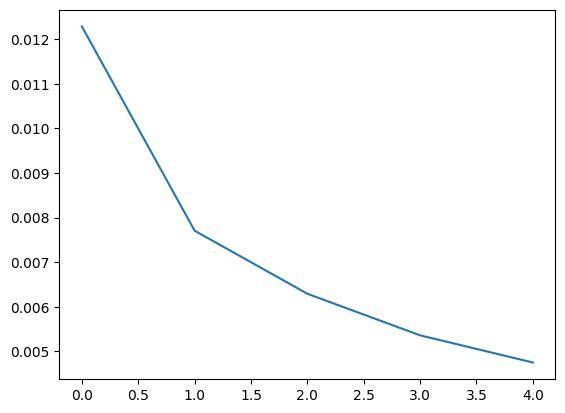

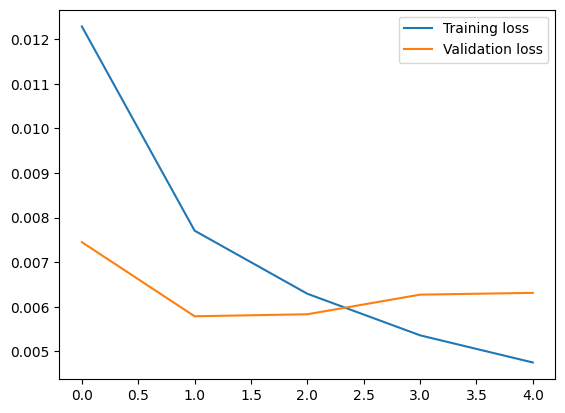

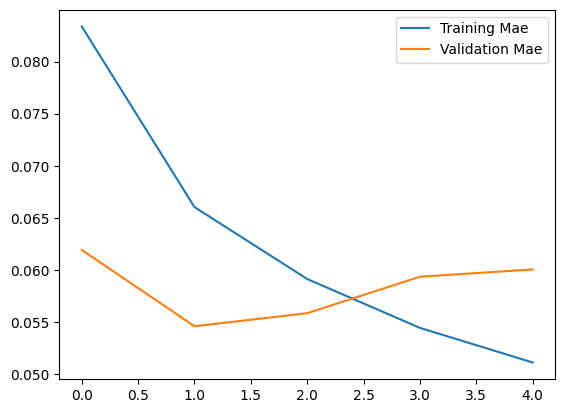

In [19]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 1s 4ms/step


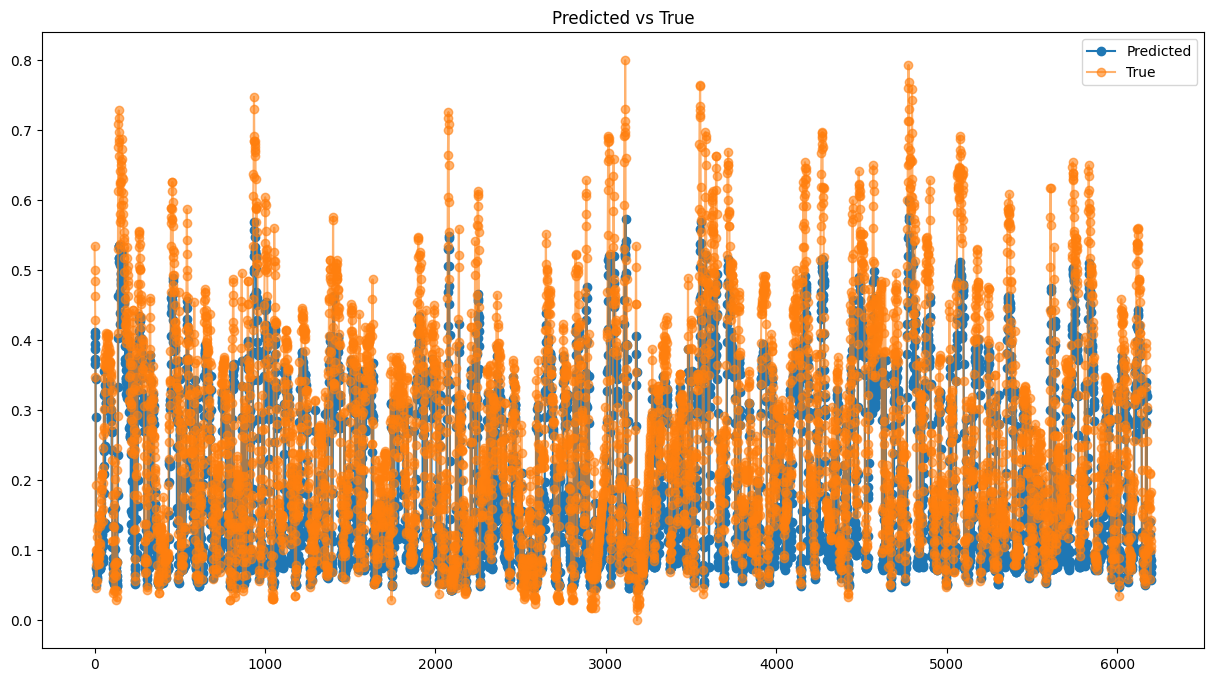

In [20]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [21]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.07601867942514268,
 'mse': 0.09587774476329491,
 'rmse': 0.009192541940895525}

# Entrenamiento Vanilla LSTM sin dropout

In [22]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [23]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/vanilla_NO_dropout_balanceado.h5')

Epoch 1/50
261/261 [==============================] - 4s 11ms/step - loss: 0.0080 - mae: 0.0651 - mse: 0.0080 - val_loss: 0.0051 - val_mae: 0.0507 - val_mse: 0.0051
Epoch 2/50
261/261 [==============================] - 3s 10ms/step - loss: 0.0038 - mae: 0.0452 - mse: 0.0038 - val_loss: 0.0038 - val_mae: 0.0434 - val_mse: 0.0038
Epoch 3/50
261/261 [==============================] - 3s 11ms/step - loss: 0.0031 - mae: 0.0406 - mse: 0.0031 - val_loss: 0.0032 - val_mae: 0.0398 - val_mse: 0.0032
Epoch 4/50
261/261 [==============================] - 2s 9ms/step - loss: 0.0028 - mae: 0.0377 - mse: 0.0028 - val_loss: 0.0028 - val_mae: 0.0367 - val_mse: 0.0028
Epoch 5/50
261/261 [==============================] - 2s 10ms/step - loss: 0.0025 - mae: 0.0361 - mse: 0.0025 - val_loss: 0.0026 - val_mae: 0.0356 - val_mse: 0.0026
Epoch 6/50
261/261 [==============================] - 3s 10ms/step - loss: 0.0024 - mae: 0.0351 - mse: 0.0024 - val_loss: 0.0025 - val_mae: 0.0344 - val_mse: 0.0025
Epoch 7/50


194/194 [==============================] - 1s 5ms/step - loss: 0.0031 - mae: 0.0384 - mse: 0.0031
test loss, test acc: [0.003059352980926633, 0.03839965537190437, 0.003059352980926633]


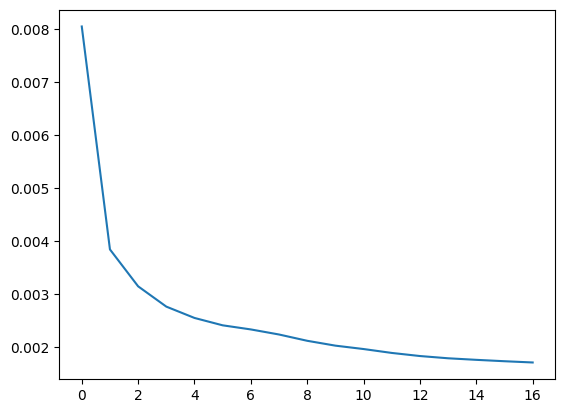

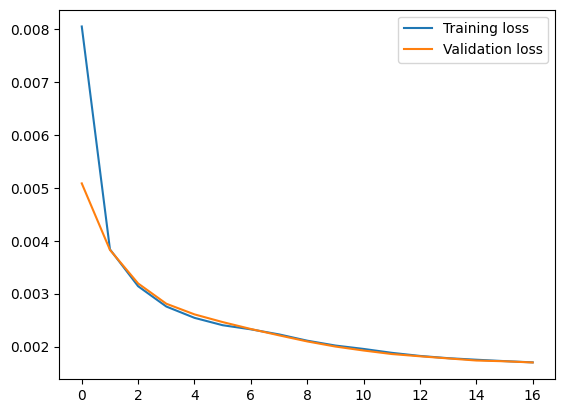

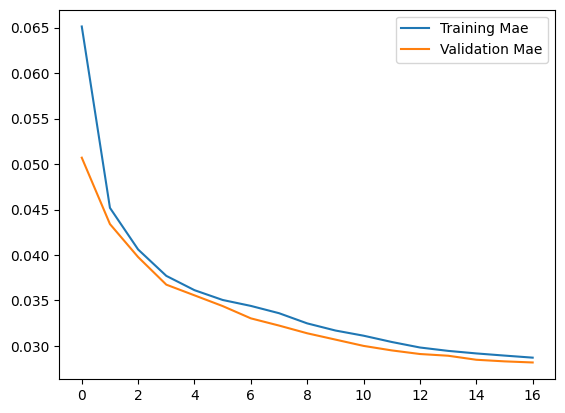

In [24]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 1s 4ms/step


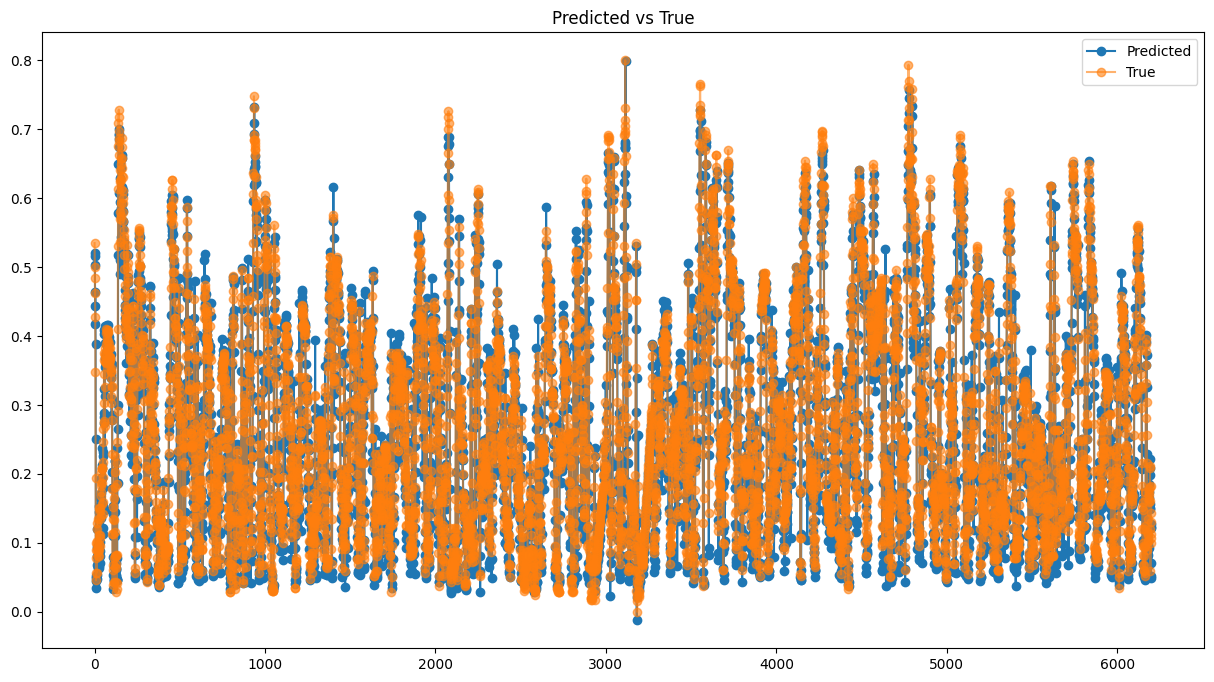

In [25]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [26]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03839967148634183,
 'mse': 0.05531140869034646,
 'rmse': 0.003059351931310534}

# Entrenamiento Stacked LSTM con dropout

In [27]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [28]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/stacked_dropout_balanceado.h5')

Epoch 1/50
261/261 [==============================] - 8s 22ms/step - loss: 0.0154 - mae: 0.0947 - mse: 0.0154 - val_loss: 0.0095 - val_mae: 0.0692 - val_mse: 0.0095
Epoch 2/50
261/261 [==============================] - 5s 19ms/step - loss: 0.0087 - mae: 0.0700 - mse: 0.0087 - val_loss: 0.0068 - val_mae: 0.0588 - val_mse: 0.0068
Epoch 3/50
261/261 [==============================] - 5s 21ms/step - loss: 0.0064 - mae: 0.0594 - mse: 0.0064 - val_loss: 0.0047 - val_mae: 0.0489 - val_mse: 0.0047
Epoch 4/50
261/261 [==============================] - 6s 22ms/step - loss: 0.0051 - mae: 0.0530 - mse: 0.0051 - val_loss: 0.0046 - val_mae: 0.0487 - val_mse: 0.0046
Epoch 5/50
261/261 [==============================] - 5s 20ms/step - loss: 0.0045 - mae: 0.0497 - mse: 0.0045 - val_loss: 0.0048 - val_mae: 0.0494 - val_mse: 0.0048
Epoch 6/50
261/261 [==============================] - 5s 19ms/step - loss: 0.0040 - mae: 0.0471 - mse: 0.0040 - val_loss: 0.0042 - val_mae: 0.0463 - val_mse: 0.0042
Epoch 7/50

194/194 [==============================] - 2s 11ms/step - loss: 0.0046 - mae: 0.0502 - mse: 0.0046
test loss, test acc: [0.004568652715533972, 0.050199318677186966, 0.004568652715533972]


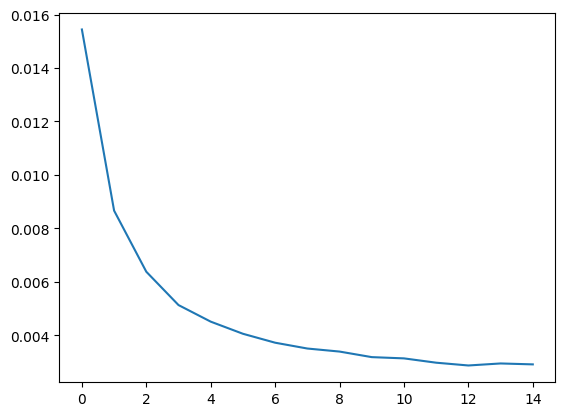

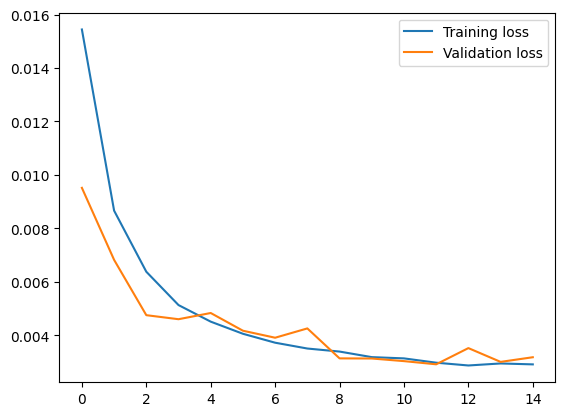

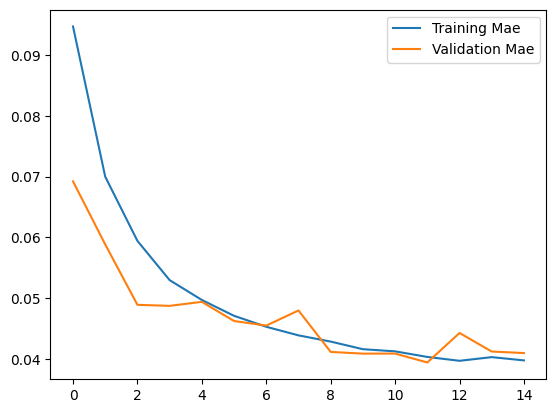

In [29]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 10ms/step


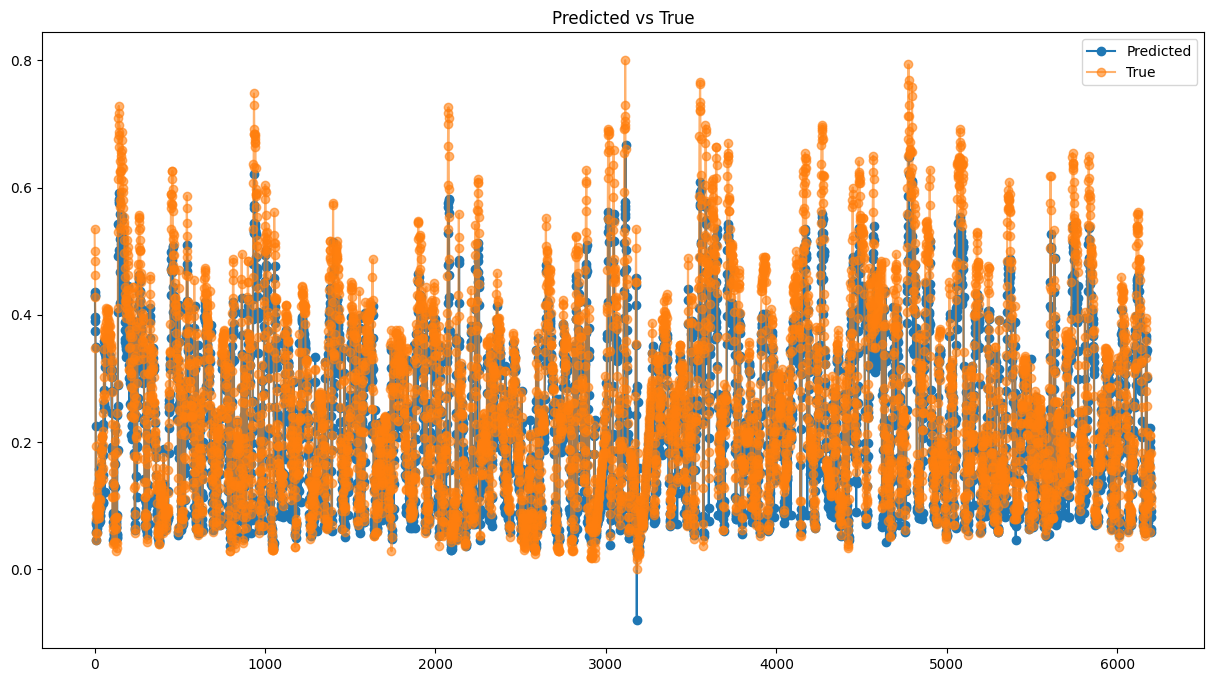

In [30]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [31]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.05019932123673549,
 'mse': 0.0675918062276539,
 'rmse': 0.004568652269116713}

# Entrenamiento Stacked LSTM sin dropout

In [32]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [33]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/stacked_NO_dropout_balanceado.h5')

Epoch 1/50
261/261 [==============================] - 12s 33ms/step - loss: 0.0108 - mae: 0.0778 - mse: 0.0108 - val_loss: 0.0072 - val_mae: 0.0601 - val_mse: 0.0072
Epoch 2/50
261/261 [==============================] - 8s 33ms/step - loss: 0.0053 - mae: 0.0533 - mse: 0.0053 - val_loss: 0.0042 - val_mae: 0.0471 - val_mse: 0.0042
Epoch 3/50
261/261 [==============================] - 8s 31ms/step - loss: 0.0037 - mae: 0.0446 - mse: 0.0037 - val_loss: 0.0034 - val_mae: 0.0418 - val_mse: 0.0034
Epoch 4/50
261/261 [==============================] - 9s 34ms/step - loss: 0.0030 - mae: 0.0398 - mse: 0.0030 - val_loss: 0.0028 - val_mae: 0.0379 - val_mse: 0.0028
Epoch 5/50
261/261 [==============================] - 8s 31ms/step - loss: 0.0026 - mae: 0.0365 - mse: 0.0026 - val_loss: 0.0025 - val_mae: 0.0352 - val_mse: 0.0025
Epoch 6/50
261/261 [==============================] - 9s 33ms/step - loss: 0.0023 - mae: 0.0342 - mse: 0.0023 - val_loss: 0.0022 - val_mae: 0.0324 - val_mse: 0.0022
Epoch 7/5

194/194 [==============================] - 3s 13ms/step - loss: 0.0030 - mae: 0.0380 - mse: 0.0030
test loss, test acc: [0.0029932057950645685, 0.03800201416015625, 0.0029932057950645685]


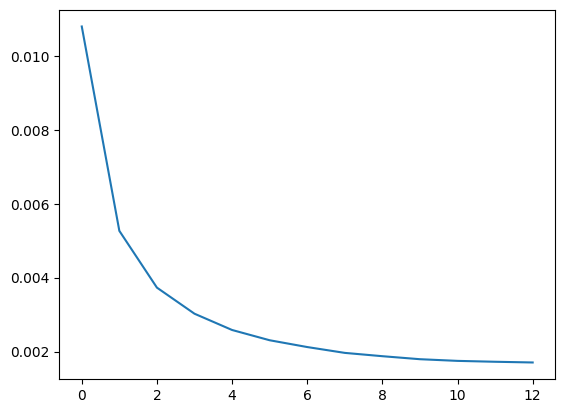

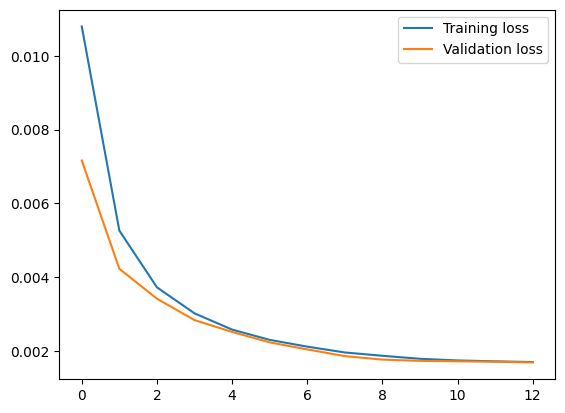

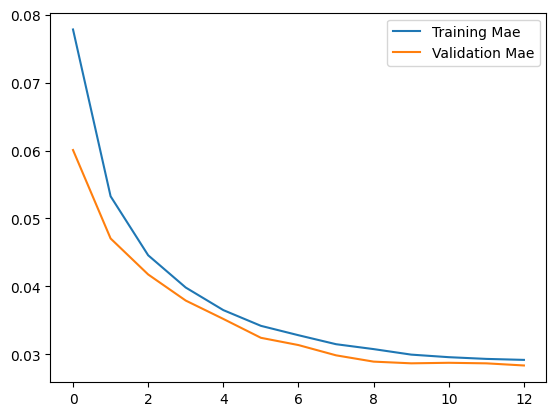

In [34]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 3s 12ms/step


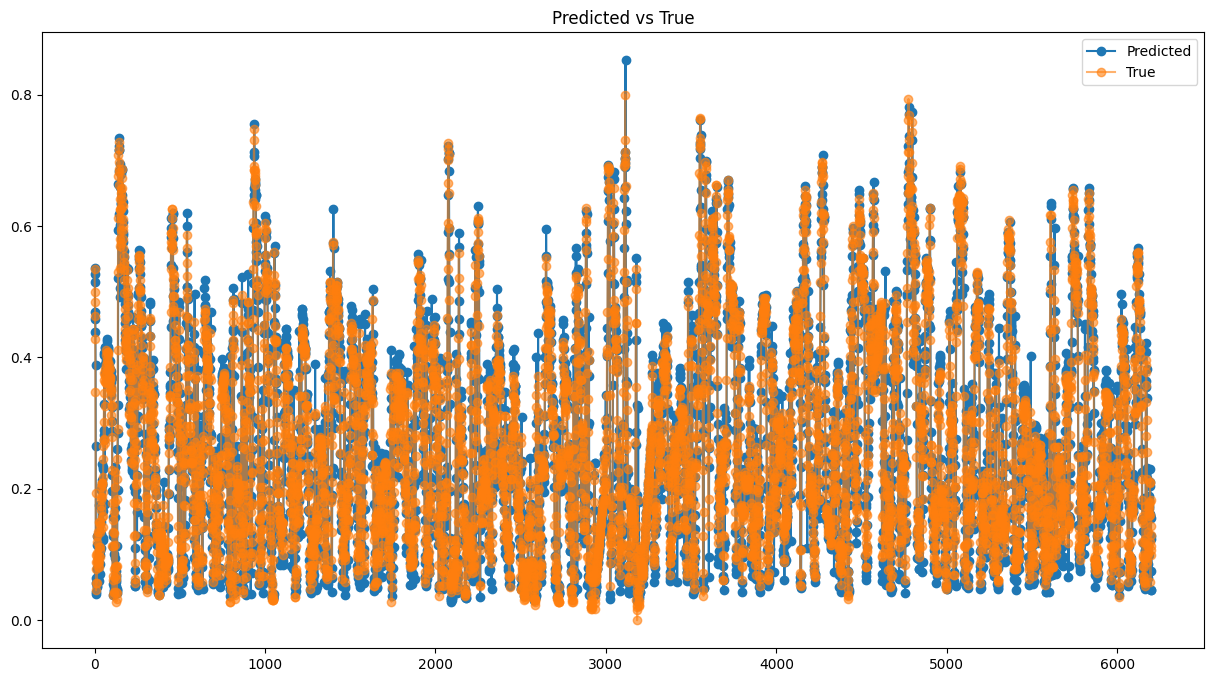

In [35]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [36]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.038002010045048745,
 'mse': 0.05471020686235341,
 'rmse': 0.0029932067349215017}

# Entrenamiento Bidirectional LSTM con dropout

In [37]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [38]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/bidirectional_dropout_balanceado.h5')

Epoch 1/50
261/261 [==============================] - 11s 30ms/step - loss: 0.0148 - mae: 0.0916 - mse: 0.0148 - val_loss: 0.0076 - val_mae: 0.0625 - val_mse: 0.0076
Epoch 2/50
261/261 [==============================] - 7s 26ms/step - loss: 0.0079 - mae: 0.0660 - mse: 0.0079 - val_loss: 0.0057 - val_mae: 0.0534 - val_mse: 0.0057
Epoch 3/50
261/261 [==============================] - 6s 25ms/step - loss: 0.0063 - mae: 0.0588 - mse: 0.0063 - val_loss: 0.0052 - val_mae: 0.0511 - val_mse: 0.0052
Epoch 4/50
261/261 [==============================] - 6s 25ms/step - loss: 0.0053 - mae: 0.0536 - mse: 0.0053 - val_loss: 0.0050 - val_mae: 0.0511 - val_mse: 0.0050
Epoch 5/50
261/261 [==============================] - 6s 21ms/step - loss: 0.0048 - mae: 0.0513 - mse: 0.0048 - val_loss: 0.0047 - val_mae: 0.0491 - val_mse: 0.0047
Epoch 6/50
261/261 [==============================] - 6s 24ms/step - loss: 0.0043 - mae: 0.0489 - mse: 0.0043 - val_loss: 0.0044 - val_mae: 0.0492 - val_mse: 0.0044
Epoch 7/5

194/194 [==============================] - 2s 9ms/step - loss: 0.0049 - mae: 0.0521 - mse: 0.0049
test loss, test acc: [0.00493578752502799, 0.05206061527132988, 0.00493578752502799]


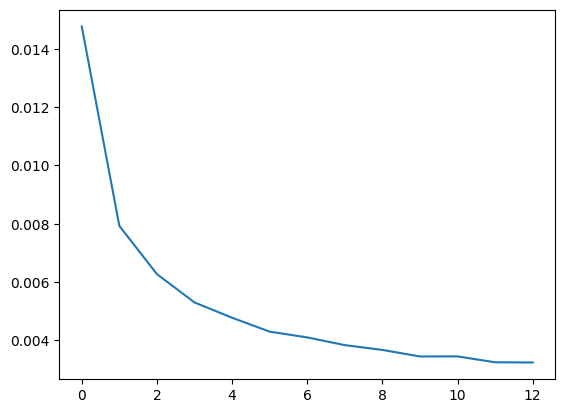

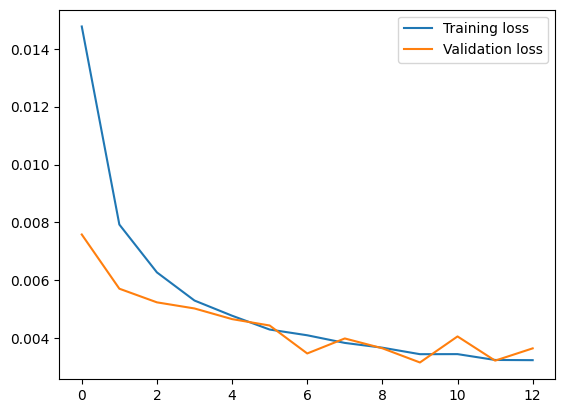

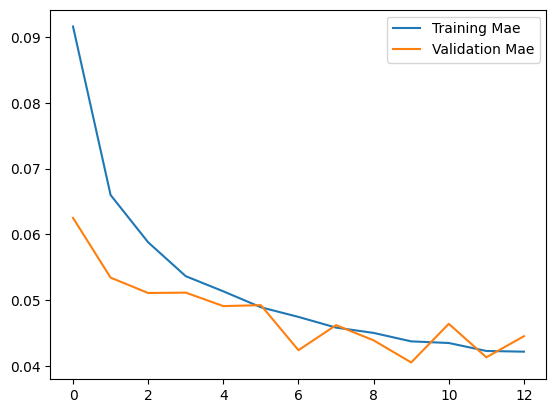

In [39]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 8ms/step


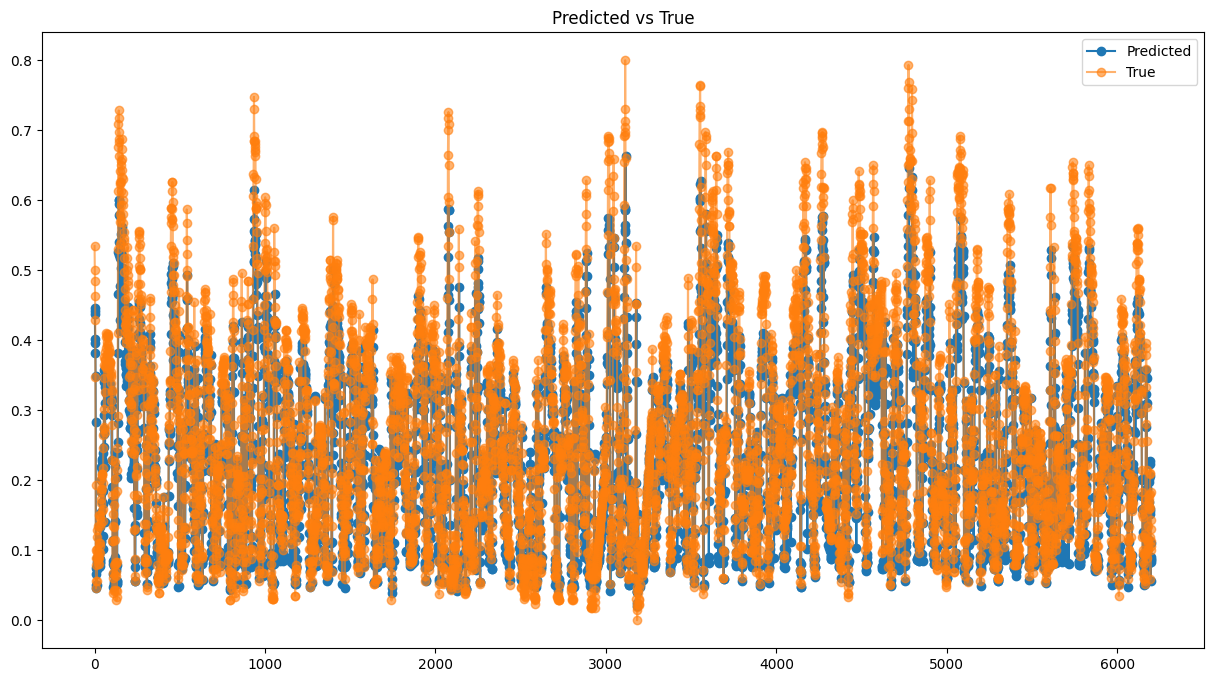

In [40]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [41]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.052060618909347725,
 'mse': 0.07025516908584489,
 'rmse': 0.004935788783280656}

# Entrenamiento Bidirectional LSTM sin dropout

In [42]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [43]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/bidirectional_NO_dropout_balanceado.h5')

Epoch 1/50
261/261 [==============================] - 10s 26ms/step - loss: 0.0082 - mae: 0.0672 - mse: 0.0082 - val_loss: 0.0062 - val_mae: 0.0574 - val_mse: 0.0062
Epoch 2/50
261/261 [==============================] - 6s 25ms/step - loss: 0.0040 - mae: 0.0463 - mse: 0.0040 - val_loss: 0.0040 - val_mae: 0.0450 - val_mse: 0.0040
Epoch 3/50
261/261 [==============================] - 6s 24ms/step - loss: 0.0032 - mae: 0.0410 - mse: 0.0032 - val_loss: 0.0033 - val_mae: 0.0407 - val_mse: 0.0033
Epoch 4/50
261/261 [==============================] - 6s 25ms/step - loss: 0.0027 - mae: 0.0380 - mse: 0.0027 - val_loss: 0.0029 - val_mae: 0.0381 - val_mse: 0.0029
Epoch 5/50
261/261 [==============================] - 6s 25ms/step - loss: 0.0025 - mae: 0.0359 - mse: 0.0025 - val_loss: 0.0026 - val_mae: 0.0359 - val_mse: 0.0026
Epoch 6/50
261/261 [==============================] - 6s 24ms/step - loss: 0.0023 - mae: 0.0345 - mse: 0.0023 - val_loss: 0.0024 - val_mae: 0.0342 - val_mse: 0.0024
Epoch 7/5

194/194 [==============================] - 2s 12ms/step - loss: 0.0034 - mae: 0.0411 - mse: 0.0034
test loss, test acc: [0.0034093535505235195, 0.04112659767270088, 0.0034093535505235195]


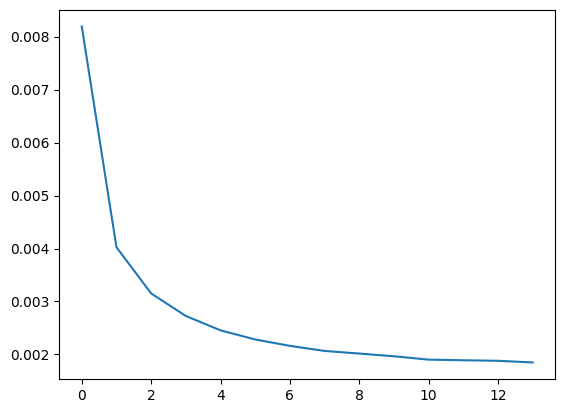

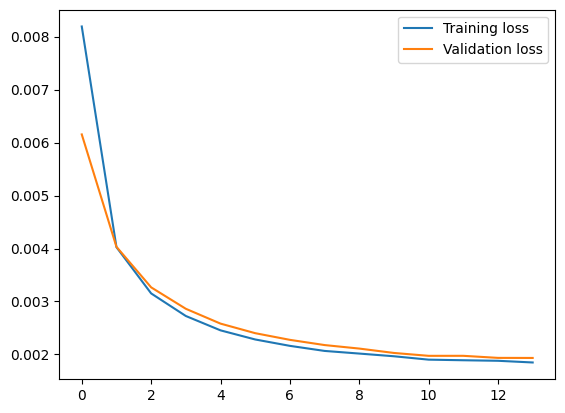

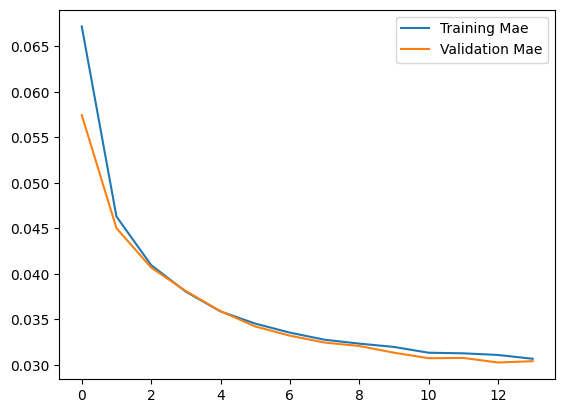

In [44]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 3s 10ms/step


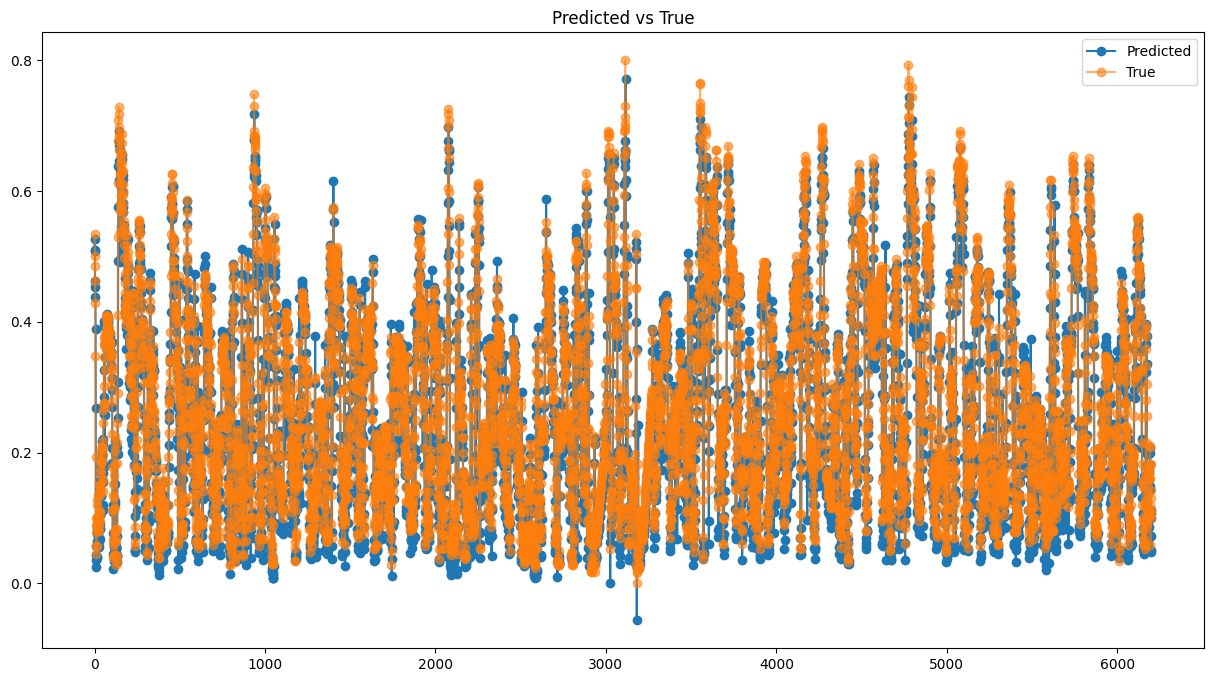

In [45]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [46]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04112658658551121,
 'mse': 0.05838966237140196,
 'rmse': 0.0034093526718463143}